# Assignment 6




| Topic | Information |
| --------  |  -------- |
| Team Members | Antonio Cascio & Krystian Confeiteiro |
| Professor    | Dr. Jack |
| Course       | DS 440 - 01DB |
| Assignment   | Assignment 6 |
| Date         | 11/05/2023 |

## Assignment Objective

Our objectives are
1. Choose two algorithms in [Module 5](https://drive.google.com/drive/folders/1d5SId49UAug0FSlVZggGr54yM3H4JW4j?usp=drive_link) and [Naive Bayesian Classifier](https://drive.google.com/drive/folders/14-eyH9aV0Tb2eqscA9sDfiAOzHfsgSjq?usp=drive_link) to train three classifiers on the wine dataset provided by `sklearn` which is used in `Week7_NaiveBayes.ipynb`.
2. Plot the three classifiers' confusion matrices.

# Assignment Checklist


- [x]  Choose two algorithms in [Module 5](https://drive.google.com/drive/folders/1d5SId49UAug0FSlVZggGr54yM3H4JW4j?usp=drive_link) and [Naive Bayesian Classifier](https://drive.google.com/drive/folders/14-eyH9aV0Tb2eqscA9sDfiAOzHfsgSjq?usp=drive_link) to train three classifiers on the wine dataset provided by `sklearn` which is used in `Week7_NaiveBayes.ipynb`
- [x]  Choose three classification models
- [x]  Write code and train models:
    - [x]  Random Forest Classifier
    - [x]  Decision Tree Classifier
    - [x]  Naive-Bayes Classifier
- [x]  Evaluate confusion matrices for all three models
    - [x]  Random Forest Classifier
    - [x]  Decision Tree Classifier
    - [x]  Naive-Bayes Classifier
- [x]  Write function to evaluate all models
- [x]  Finish code for model evaluations
- [x]  Write code into [Google Colab](https://colab.research.google.com/drive/1mmizA9Et0bxAwXzY9EeueeJJx6RXrimY)
- [x]  Send to [Antonio](https://www.notion.so/fd8b902ab33d409fa30c5710412c1cb4?pvs=21) for him to submit
- [x]  Submit code in [Canvas](https://erau.instructure.com/courses/163647/assignments/3329373)

# Code

## Imports & Warnings

In [ ]:
%pip install mixed_naive_bayes

In [ ]:
import warnings
from typing import Any, NamedTuple, Sequence

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mixed_naive_bayes import MixedNB
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")

## Helper Classes

These classes below are [named tuples](https://docs.python.org/3/library/typing.html?highlight=namedtuple#typing.NamedTuple) (called in-code as `NamedTuple()`) where we will pull the properties outlined in their `class` definition lines:

In [ ]:
class ModelReturns(NamedTuple):
    training_acc: Sequence[int | float]
    testing_acc: Sequence[int | float]
    y_pred_train: Sequence[int | float]
    y_pred_test: Sequence[int | float]
    model: Any


class ModelLayout(NamedTuple):
    X_train: Any
    X_test: Any
    y_train: Any
    y_test: Any
    X_vals: Any
    y_vals: Any


class ConfMatCFG(NamedTuple):
    true_values: Any
    predictions: Any
    model: Any
    save_as: str = None
    classes: Any = None


class ConfMatReturns(NamedTuple):
    true_positive_rate: float | int = None
    false_positive_rate: float | int = None
    true_negative_rate: float | int = None
    false_negative_rate: float | int = None
    disp: Any = None

## Define Functions

### Data Preparation

In [ ]:
def prepare_data(**kwargs):
    X, y = load_wine(return_X_y=True, as_frame=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, **kwargs)
    return ModelLayout(X_train, X_test, y_train, y_test, X, y)

### Confusion Matrix

In [ ]:
def confusion_matrix_figure(*setups: ConfMatCFG, figsize=(10, 7), display=False):
    returns = []
    for setup in setups:
        true_values, predictions, classes = (
            setup.true_values,
            setup.predictions,
            setup.classes,
        )
        values = confusion_matrix(true_values, predictions, labels=classes)
        disp = ConfusionMatrixDisplay(confusion_matrix=values, display_labels=classes)

        with plt.ioff():
            plt.figure(figsize=figsize)

            cfm_plot = sns.heatmap(
                pd.DataFrame(values, index=classes, columns=classes),
                annot=True,
            )

            cfm_plot.set(title=setup.model)

            if setup.save_as:
                cfm_plot.figure.savefig(setup.save_as)

        if display:
            plt.show()

        returns.append(ConfMatReturns(*values, disp))

    return returns

### Machine Learning Models

In [ ]:
# define function for naive-bayes classifier
def naive_bayes(X_train, X_test, y_train, y_test, **kwargs):
    # instantiate & fit model
    MODEL = MixedNB(**kwargs)
    MODEL.fit(X_train, y_train)

    # training and testing predictions
    pred_train_y = MODEL.predict(X_train)
    pred_test_y = MODEL.predict(X_test)

    # training and testing accuray scores
    training_acc = accuracy_score(y_train, pred_train_y)
    testing_acc = accuracy_score(y_test, pred_test_y)

    return ModelReturns(training_acc, testing_acc, pred_train_y, pred_test_y, MODEL)


# define function for decision tree classifier
def decision_tree(
    X_train,
    X_test,
    y_train,
    y_test,
    criterion="entropy",
    random_state=1,
    **kwargs,
):
    # instantiate & fit model
    MODEL = DecisionTreeClassifier(
        random_state=random_state, criterion=criterion, **kwargs
    )
    MODEL.fit(X_train, y_train)

    # training and testing predictions
    pred_train_y = MODEL.predict(X_train)
    pred_test_y = MODEL.predict(X_test)

    # training and testing accuray scores
    training_acc = accuracy_score(y_train, pred_train_y)
    testing_acc = accuracy_score(y_test, pred_test_y)

    return ModelReturns(training_acc, testing_acc, pred_train_y, pred_test_y, MODEL)


# define function for random forest classifier
def random_forest(X_train, X_test, y_train, y_test, **kwargs):
    # instantiate & fit model
    MODEL = RandomForestClassifier(**kwargs)
    MODEL.fit(X_train, y_train)

    # training and testing predictions
    ypred_train = MODEL.predict(X_train)
    ypred_test = MODEL.predict(X_test)

    # training and testing accuray scores
    training_acc = accuracy_score(y_train, ypred_train)
    testing_acc = accuracy_score(y_test, ypred_test)

    return ModelReturns(training_acc, testing_acc, ypred_train, ypred_test, MODEL)

### Evaluation of All Models

In [ ]:
def evaluate_all_models(data, **kwargs):
    return {
        "naive-bayes": naive_bayes(*data, **kwargs),
        "decision tree": decision_tree(*data, **kwargs),
        "random forest": random_forest(*data, **kwargs),
    }

## Prepare Data, Call Functions, Etc.

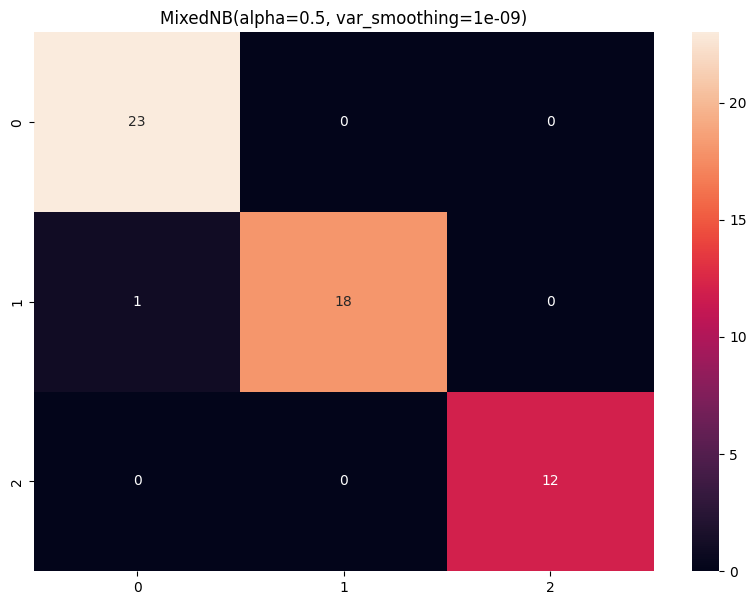

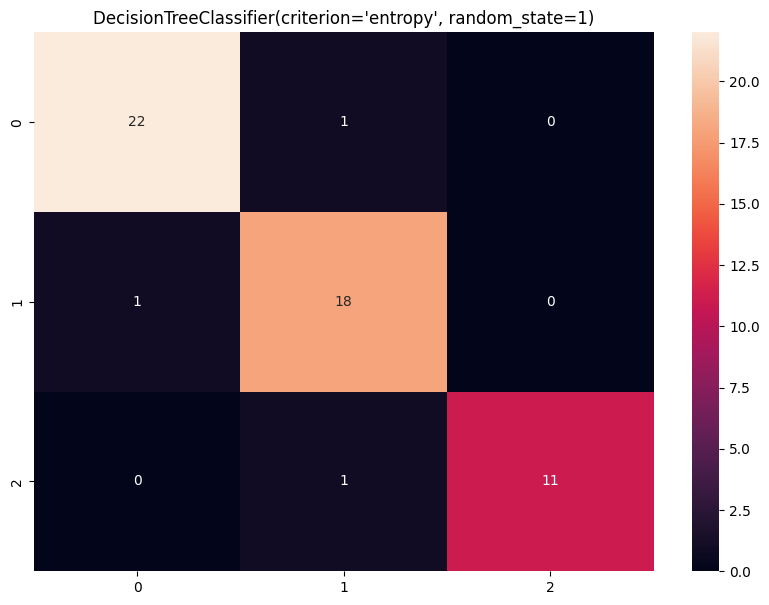

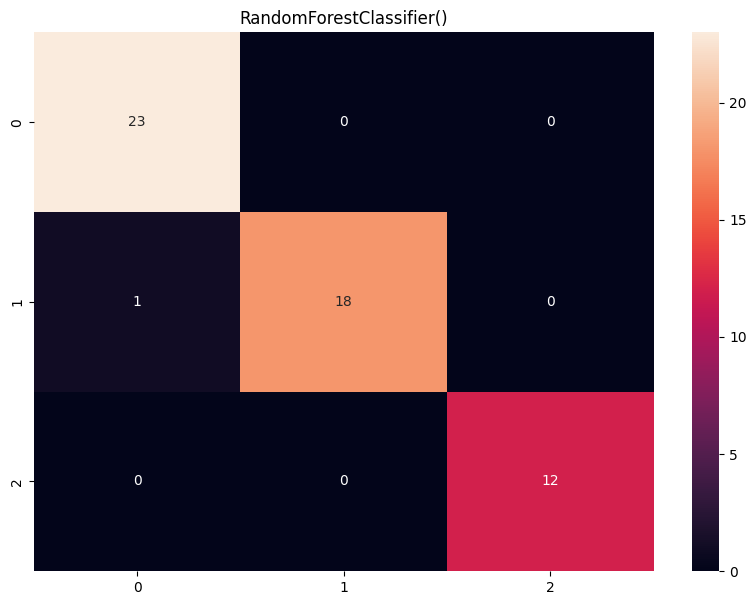

In [7]:
if __name__ == "__main__":
    # prepare data and define values
    DATA = prepare_data(test_size=0.3, random_state=1)
    X_train = DATA.X_train
    X_test = DATA.X_test
    y_train = DATA.y_train
    y_test = DATA.y_test
    X_vals, y_vals = DATA.X_vals, DATA.y_vals

    # evaluate all models
    MODELS = evaluate_all_models((X_train, X_test, y_train, y_test))
    NBC = MODELS["naive-bayes"]
    DTC = MODELS["decision tree"]
    RFC = MODELS["random forest"]

    # set number of classes for confusion matricies
    classes = [0, 1, 2]

    # plot and/or confusion matricies for all three models
    NBC_CM, DTC_CM, RFC_CM = confusion_matrix_figure(
        ConfMatCFG(y_test, NBC.y_pred_test, NBC.model, classes=classes),
        ConfMatCFG(y_test, DTC.y_pred_test, DTC.model, classes=classes),
        ConfMatCFG(y_test, RFC.y_pred_test, RFC.model, classes=classes),
        display=True
    )
